# **US ACCIDENTS EXPLORATORY DATA ANALYSIS**

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

- Kaggle
- informaiton about accidents
- can be useful to prevent accidents



**Download the Dataset.**

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adrijamukhopadhyay
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 178MB/s]


To make file access easier, let’s add the file name as

In [ ]:
data_filename = '/content/us-accidents/US_Accidents_Dec21_updated.csv'

## **Data Preparation and Cleaning**
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


The data has about 2.8 million rows and 47 columns. Let us see what the columns have for us to analyze.

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

The above list ends by saying that there are 13 boolean type, 13 float type, 1 integer, and 20 object type of data.

Moving on to summary statistics of the columns-

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
# to find total no. of columns containing numeric data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

The data has 14 numeric columns while the rest are categorical variables.

## Data Cleaning

**Percentage of missing values per column**

In [ ]:
#to find number of blank or null values in each column
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False)*100 / len(df)
missing_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

Column name number has approx 50% or above missing data . It is wise to either remove the columns altogether or exclude them from the ensuing analysis.

In [ ]:
type(missing_percentages)

pandas.core.series.Series

Let us now see what the above numbers would look like visually. Plotting a horizontal bar chart as-

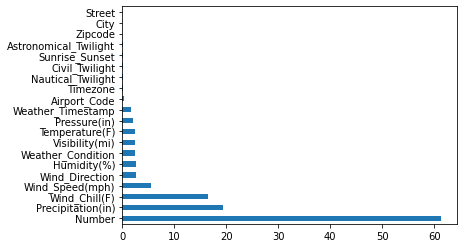

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use.




In [ ]:
# dropping useless columns

df.drop(columns={'Number','Precipitation(in)','Wind_Chill(F)','Astronomical_Twilight','Nautical_Twilight',
                 'Civil_Twilight','Sunrise_Sunset','Turning_Loop','Traffic_Calming','Stop','Station','Roundabout',
                'Railway','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit','Precipitation(in)',
                 'Wind_Direction','Zipcode', 'Country','Airport_Code', 'Weather_Timestamp','County','End_Lat',
                 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street','Side','End_Time'}, inplace=True)

# lets verify by checking length of dataframe.
len(df.columns)

15

#Exploratory Analysis and Visualization

Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface

Columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City',
       'State', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition',
       'Traffic_Signal'],
      dtype='object')

**City**

The column lists the name of the city in the address record. Let us now check how many cities of the top ten states above feature in the top 30 cities by accidents.

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
#lets see unique values in City column
cities = df.City.unique()
cities


array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [ ]:
# It seems there are many unique cities
# lets see no. of unique cities
len(df.City.unique())

11682

The total number of cities is 11,682

In [ ]:
# To find no. of accidents in each cities
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

The top cities include Miami, Los Angeles, Orlando, Dallas, Houston,etc. Let’s visualize the top 20 cities and see how many belong to the top ten states.

In [ ]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

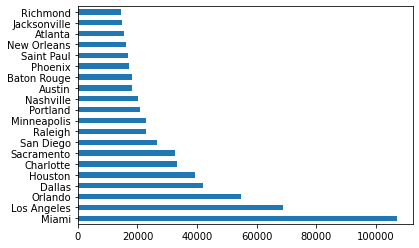

In [ ]:
cities_by_accident[:20].plot(kind='barh')

There is quite a lot of presence of cities from **Florida** (Miami, Orlando)followed by **California** (LA, Sacramento, San Diego, Jacksonville),  **Texas** (Houston, Dallas, Austin) , and **North Carolina** (Charlotte,Raleigh). This is in tandem with the top  states:  Florida,California, Texas, and North Carolina.

How would the distribution of cities by the number of accidents look like?

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


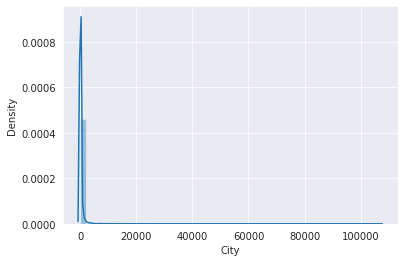

In [ ]:
sns.distplot(cities_by_accident)

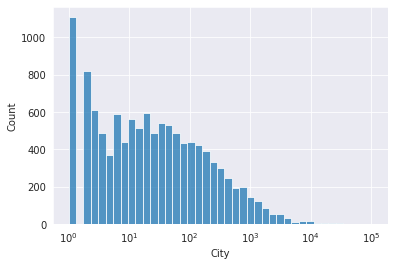

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

Over 1200 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data. Let’s break cities by accidents into two groups and see their respective distributions-

* High accident cities where the number of accidents is greater and equal to 1000.

* Low accident cities where the number is less than 1000.





In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]


What is the percentage of high accident cities?


In [ ]:
len(high_accident_cities)*100 / len(cities)

4.245848313644924

4.24% of the total number of cities have an accident number greater than 1000.

The distribution of high accident cities look as-

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


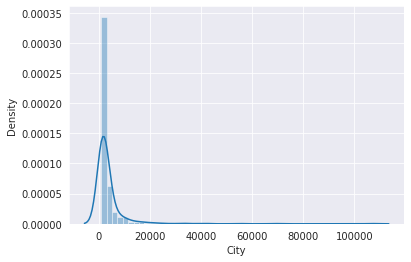

In [ ]:
sns.distplot(high_accident_cities)

Less than 150 cities (out of 11682) reported more than 10000 accidents during the period between February  and December . 

Similarly, the cities with the low number of accidents are picturized as-

In [ ]:
len(low_accident_cities)*100 / len(cities)

95.74559150830338

95.74% of the total number of cities have an accident number less than 1000

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


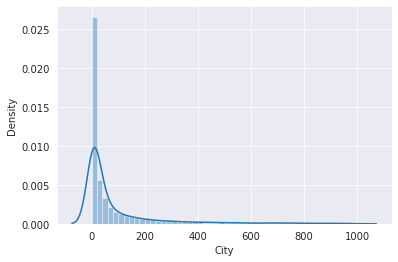

In [ ]:
sns.distplot(low_accident_cities)

* Over 1200 cities have had just one accident in 4years- needs further investigation.
* The majority of them have witnessed between 10–100 accidents during the period.
* Accidents by cities follow an exponentially decreasing distribution.

Which 5 states have the highest number of accidents?

**State**


The column lists down the name of the US state found in the address of the accident. 

In [ ]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object

In [ ]:
states = df.State.unique()
len(states)

49

In [ ]:
states_by_accident = df.State.value_counts()
states_by_accident

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

Let’s look at the five ten states by the number of accidents. 

In [51]:
states_by_accident[:5]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

Among the top 100 cities in number of accidents, which states do they belong to most frequently.

  The cities with most number of accidents are **California**, **Florida**, **Texas**, **Oregon**, **Virginia**.

In [52]:
states_by_accident[:100]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

**Start Time**

This column records the start time of the accident in the local time zone.

In [53]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [54]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [55]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

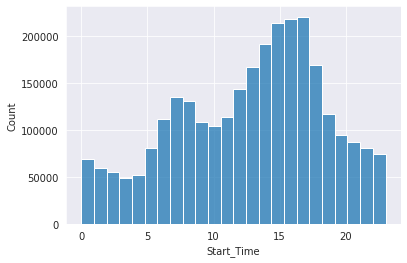

In [56]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

What time of the day are accidents most frequent in?

There are two peaks of time- one in the morning in between **6 am to 9 am** and another between **3 pm and 6 pm.** This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.
(Mostly the accidents occurs during evening hours it might be cause of leisure time people likely to spend outside after hectic day in office)



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


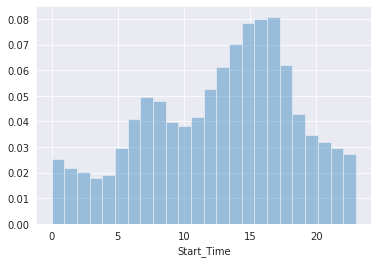

In [57]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occurs between 3 pm to 7 pm  ( probably people in a hurry to get back home  or maybe there is a lot of traffic which might cause more number of accidents.)

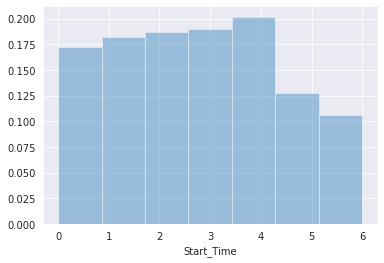

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

This shows that all the working week days had approx same number of accidents.


Is the distribution of accidents by hour the same on weekends as on weekdays.

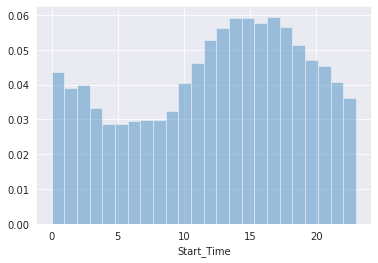

In [59]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

The distribution for Sunday sees a peak between 12 pm and 6 pm. This could be due to people going out for leisurely activities on Sundays.

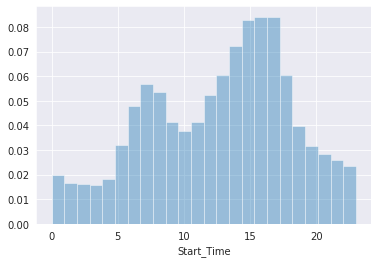

In [60]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

While Monday follows the general 24-hour pattern- two peaks coinciding with work rush

If we plot for the monthly distribution of accidents, there seems to be a steady upward curve from the second half of the year, as shown below-

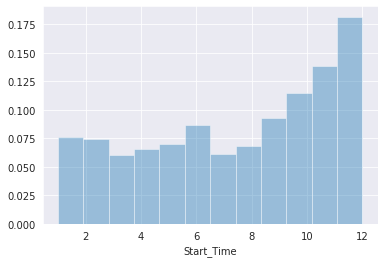

In [61]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

This could possibly be due to summer break and then the new school term around August-September.

Are there more accidents in warmer or colder areas?

There are more accidents in November and December (winter season)

In [62]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


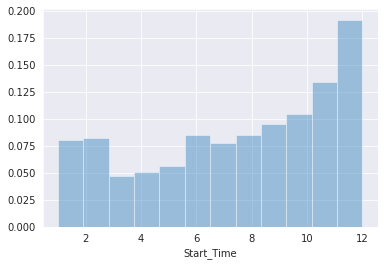

In [66]:
df_2021 = df[df.Start_Time.dt.year == 2021]
sns.distplot(df_2021.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

2021 does  show a consistent increase in accidents over the months.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


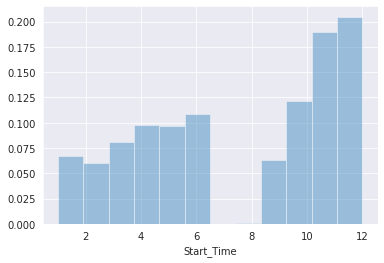

In [65]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

2020 does show a consistent increase in accidents over the months.

2019 does not show a consistent increase in accidents over the months. 

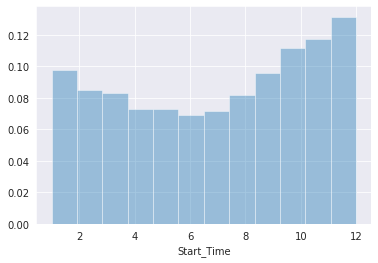

In [69]:
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

2018 does show a consistent increase in accidents over the months.

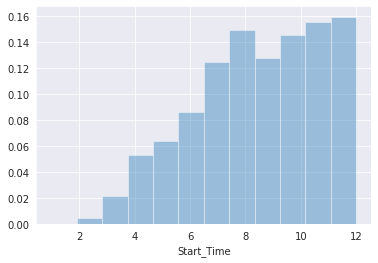

In [71]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Clearly, there is data missing for the month of January (data was collected from February 2016) and July.

Can you explain the month-wise trend of accidents?

- Much data is missing for 2016 and 2017.
- There are more accidents occurs in  the month of November and December (winter season)


**Start Latitude & Longitude**

In [72]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [73]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

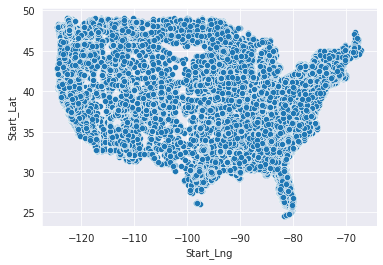

In [74]:
# plotting scatterplot for longitude & lattitude 
sns.scatterplot(x=df.Start_Lng, y= df.Start_Lat)

In [75]:
sample_df = df.sample(int(0.1 * len(df)))

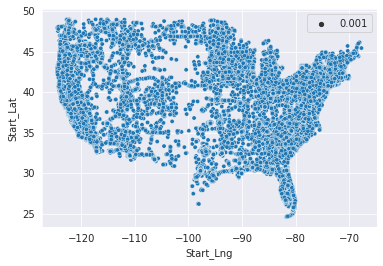

In [76]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

- US had more accidents in coast area as that area has more population.
- See, this is approx match to US map. This is warped as we didnot plotted as per scale.

## Temperature

In [77]:
# number of accidents on each temperature value
df_temp=df.groupby('Temperature(F)')[['ID']].count()
df_temp

,ID
Temperature(F),
-89.0,2
-77.8,1
-58.0,1
-50.0,1
-40.0,1
...,...
144.0,1
156.0,1
168.8,1


There are 788 records. It is hard to visualize so many records. Let's see only top 50 results.



In [78]:
# getting top 50 temperatures on which most number of accidents
df_temp_50 = df_temp.sort_values('ID',ascending=False).head(50)
df_temp_50

,ID
Temperature(F),
73.0,64505
77.0,63575
75.0,60534
72.0,59681
68.0,58557
63.0,58259
64.0,57937
70.0,57760
66.0,56336


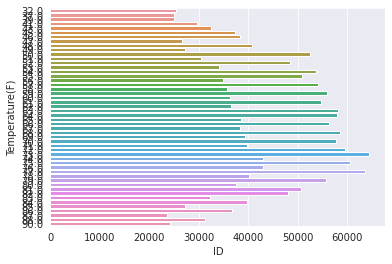

In [79]:
# plotting number of accidents on each temperature value
sns.barplot(x='ID', y= df_temp_50.index, data=df_temp_50, orient='h' );

- From graph we can say that, there is not much effect of temperature on number of accidents.
- Number of accidents are not so much affected by temperature.

## Weather Conditions

In [80]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

There are many unique weather conditions. It is hard to analyse so many conditions. Let's visualize top 20 weather conditions which had most of the accidents.

In [81]:
# top 20 weather conditions having most accidents
df_weather = df.groupby('Weather_Condition')[['ID']].count()
df_weather_20 = df_weather.sort_values('ID',ascending=False).head(20)
df_weather_20

,ID
Weather_Condition,
Fair,1107194
Mostly Cloudy,363959
Cloudy,348767
Partly Cloudy,249939
Clear,173823
Light Rain,128403
Overcast,84882
Scattered Clouds,45132
Light Snow,43752


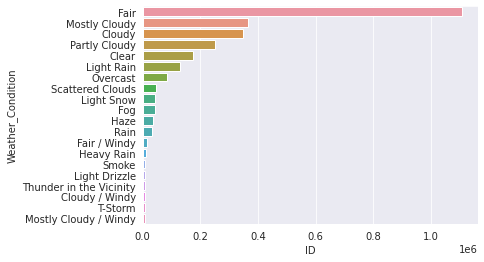

In [82]:
# plotting top 20 weather conditions having most accidents
sns.barplot(x='ID', y=df_weather_20.index, data=df_weather_20, orient='h');

- From graph and top 20 dataframe, most of the accidents happened in Fair weather condition.
- It is very surprising that most of the accidents happened in Fair weather.

##Ask & Answer Questions

**Q1. Compare severity of accidents & find how many accidents impacted most on traffic?**


* Severity column shows the severity of 
the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay)

               ID
Severity         
1           26053
2         2532991
3          155105
4          131193


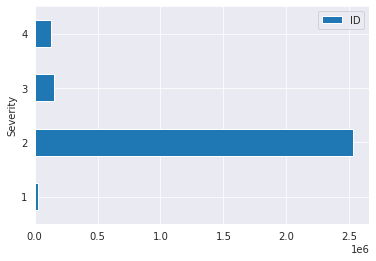

In [84]:
print(df.groupby('Severity')[['ID']].count())
df.groupby('Severity')[['ID']].count().plot(kind='barh');

- Most of the accidents were with severity 2.
- 131193 accidents had highest severity (severity 4) i.e. their impact on traffic was highest.

**Q2. Are there more accidents in warmer or colder areas?**

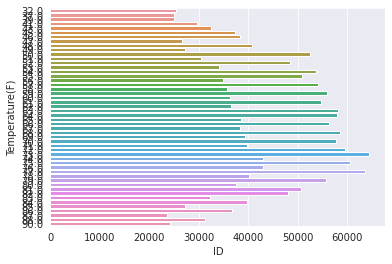

In [85]:
# from temperature analysis done earlier
sns.barplot(x='ID', y= df_temp_50.index, data=df_temp_50, orient='h' );

Number of accidents were independent of atmospheric temperature.

Q3. Is there any effect of humidity/ pressure/ visibility/ wind speed on no. of accidents?

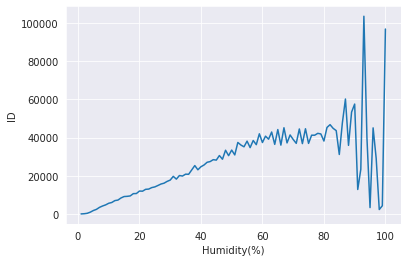

In [86]:
# Effect of Humidity
# variations of number of accidents with humidity
df_humidity = df.groupby('Humidity(%)')[['ID']].count()
sns.lineplot(x=df_humidity.index, y='ID', data=df_humidity);

- Upto 80% humidity, number of accidents increased (approx) uniformly with increase in humiidity.
- But above 80% humidity, there were much up downs in curv, let's see it in details.

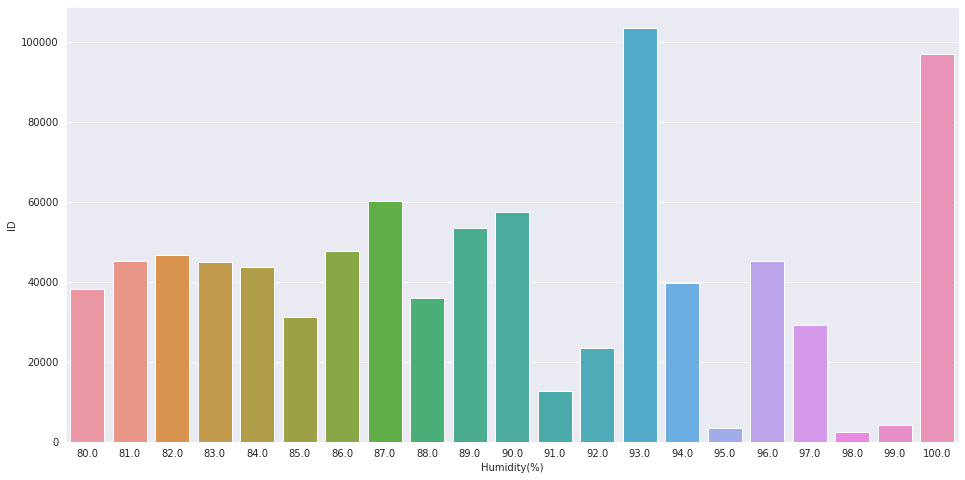

In [89]:
# plotting variations of number of accidents with humdity above 80% in the form of bar 
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
df_humidity = df.groupby('Humidity(%)')[['ID']].count()[80:100]
sns.barplot(x=df_humidity.index, y='ID', data=df_humidity);

Above 80% humidity there is no such relation between number of accidents & humidity


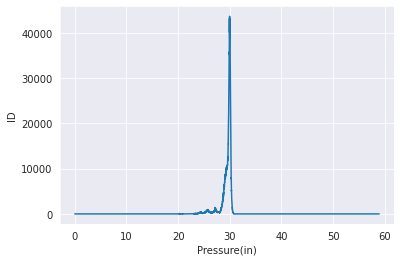

In [90]:
# Effect of Pressure
# variations of number of accidents with Pressure
df_pressure = df.groupby('Pressure(in)')[['ID']].count()
sns.lineplot(x=df_pressure.index, y='ID', data=df_pressure);

- There is variation in number of accidents from pressure 28 to 32 approximately.
- Let's visualize that range only

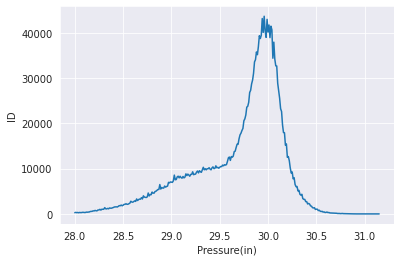

In [91]:
df_pressure = df.groupby('Pressure(in)')[['ID']].count()[28:32]
sns.lineplot(x=df_pressure.index, y='ID', data=df_pressure);

- From pressure 28(in), number of accidents increases uniformly upto 29.5 & get peak, most number of accidents at pressure 30(in).
- Number of accidents decraesed suddenly upto 30.5(in) pressure.

                     ID
Visibility(mi)         
10.0            2230276
7.0               79649
9.0               68817
8.0               55955
5.0               53933
6.0               49051
2.0               46160
4.0               45437
3.0               44012
1.0               38445


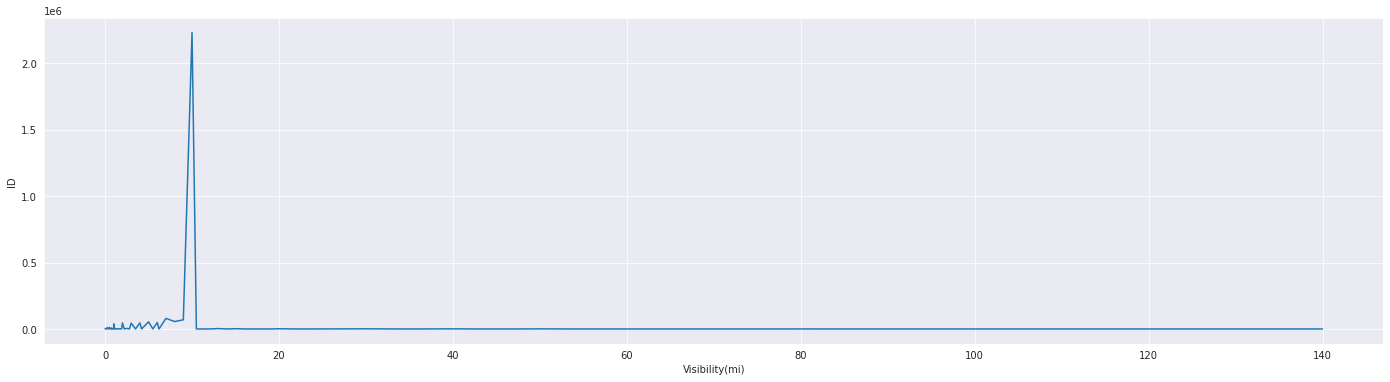

In [92]:
# Effect of Visibility
# variations of number of accidents with Visibilty
plt.figure(figsize=(24,6))
df_visibility = df.groupby('Visibility(mi)')[['ID']].count()
print(df_visibility.sort_values('ID',ascending=False).head(10))
sns.lineplot(x=df_visibility.index, y='ID', data= df_visibility);

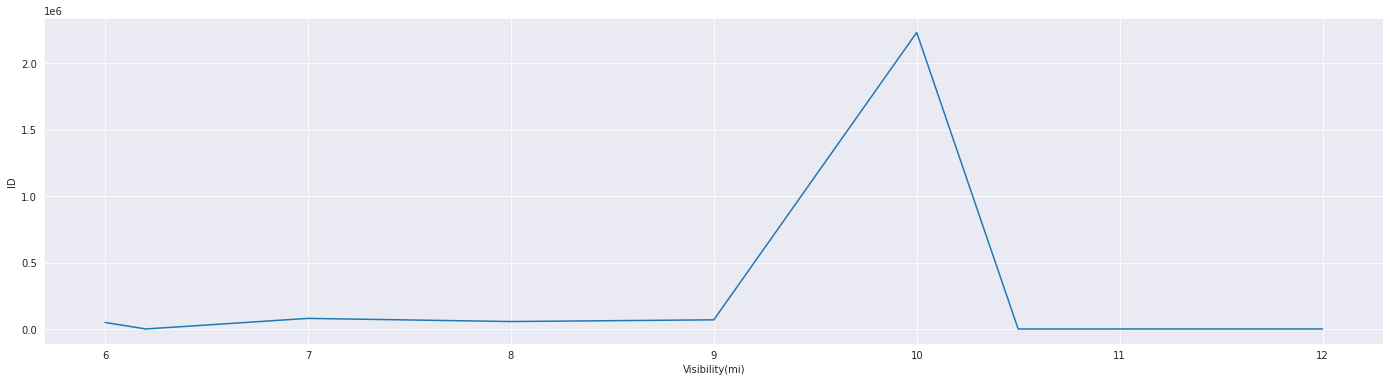

In [93]:
# to visualize clearly
plt.figure(figsize=(24,6))
df_visibility = df.groupby('Visibility(mi)')[['ID']].count()[6:12]
sns.lineplot(x=df_visibility.index, y='ID', data= df_visibility);

- Most number of accidents were at visibility 10(mi)
- Suddenly number of accidents decreased as visibility increased.
- In short, number of accidents decreased with increase in visibility.

                     ID
Wind_Speed(mph)        
0.0              433636
5.0              231000
3.0              225664
6.0              222502
7.0              205667
8.0              184037
9.0              165127
10.0             135850
12.0             117003
13.0              88872
14.0              71294
15.0              67090
5.8               45427
4.6               44989
6.9               43051
3.5               42429
16.0              40319
8.1               39945
9.2               36269
10.4              30506
17.0              29682
11.5              28029
18.0              21868
12.7              20474
13.8              17384
20.0              16184
21.0              11941
16.1              10042
22.0               8394
23.0               8290
17.3               7907
18.4               5667
24.0               4550
19.6               4259
25.0               3225
20.7               3094
26.0               2278
21.9               2250
28.0               1507
29.0            

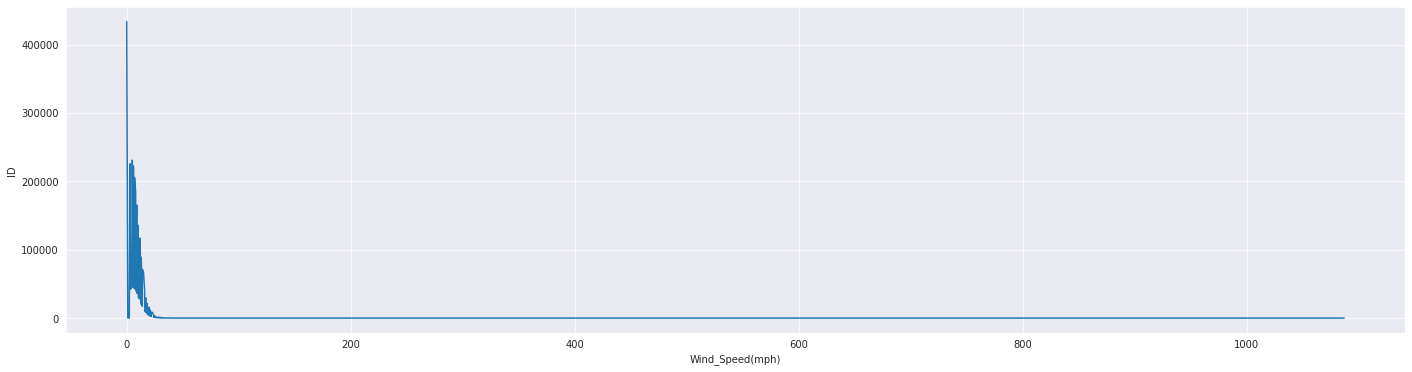

In [94]:
# Effect of wind speed
# variations of number of accidents with wind speed
plt.figure(figsize=(24,6))
df_wind = df.groupby('Wind_Speed(mph)')[['ID']].count()
print(df_wind.sort_values('ID',ascending=False).head(50))
sns.lineplot(x=df_wind.index, y='ID', data= df_wind);

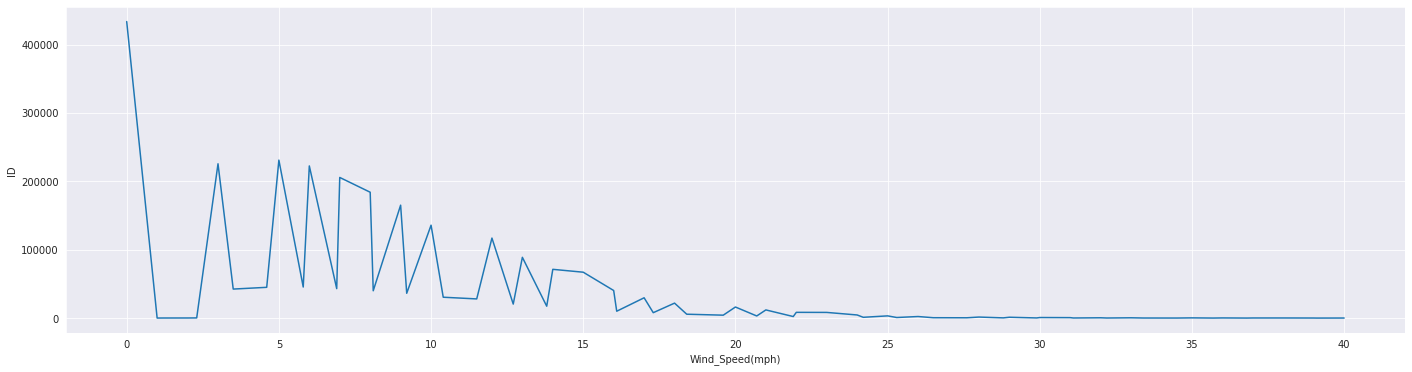

In [95]:
# to get detailed view upto wind speed 40 mph
plt.figure(figsize=(24,6))
df_wind = df.groupby('Wind_Speed(mph)')[['ID']].count()[:40]
sns.lineplot(x=df_wind.index, y='ID', data= df_wind);

It somewhat depends on wind speed but after 15mph the number of accidents decreased with increase in wind speed.

**Q4. Which states have the highest no. of accidents?**

,ID
State,
CA,795868
FL,401388
TX,149037
OR,126341
VA,113535


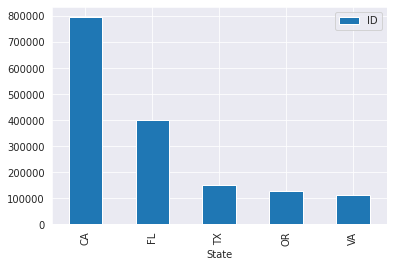

In [96]:
# find total no. of accidents in each state
df_states = df.groupby('State')[['ID']].count()

# sort dataframe in descending order
df_states = df_states.sort_values('ID', ascending=False)

# as we have to find state having highest no. of accidents,
# let's call only five top states from such long list of states
df_states.head(5).plot(kind='bar');
df_states.head(5)

State **CA** had highest number of accidents.

**Q5.Which year had most accidents?**

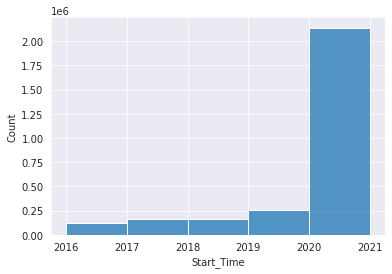

In [98]:
sns.histplot(df.Start_Time.dt.year, bins=5);

- Year 2021 had most accidents.
- From above graph of accidents by year, we can say that trend of accidents over period of time is increasing very rapidly.

**Q6. Which month of year having most accidents had most accidents?**


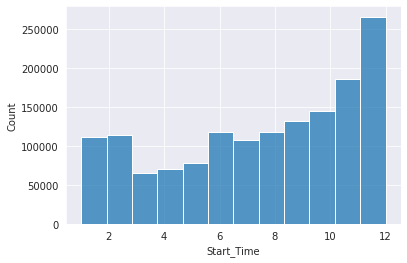

In [100]:
df_2021 = df.Start_Time[df.Start_Time.dt.year==2021]
sns.histplot(df_2021.dt.month, bins=12);

- Months November & December of year 2021 had most accidents.
- May be it is because of fog in winter season.

**Q7. Which timezone in US had most accidents?**

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64


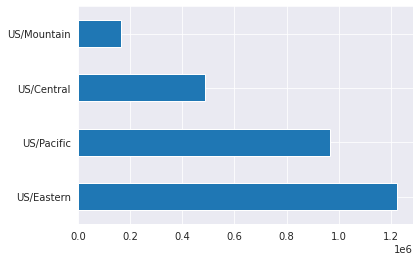

In [101]:
print(df.Timezone.value_counts())
df.Timezone.value_counts().plot(kind='barh');

Eastern timezone in US had most number of accidents.

**Q8. How many accidents happened near to traffic signal?**


In [102]:
df.Traffic_Signal.sum()

265263

This shows that 265263 accidents happened near to traffic signal

Q)Does New York show up in the data? If yes, why is the count lower if this the most populated city.

In [103]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object

In [104]:
 df.State.isin(['NY']).any()


True

#Summary and Conclusion
##Insights:
The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:

* The top 5 states by accidents include populous ones like California, Florida, Texas, Oregon, Virginia.

* Less than 5%  of cities have more than 1000 accidents in the period between February 2016 and December 2021.

* The majority of them have witnessed between 10–100 accidents during the period.

* Accidents by cities follow an exponentially decreasing distribution.

* The hypothesis that weekdays see more accidents during morning and evening rush hours is corroborated by the data.On working days of week most of the accidents happened from 7am to 9am, may be beacause of many people goes to office at this time.Also, number of accidents are more from 4pm to 6pm, may be because of it is time of returning from office.

* But on weekend days, distribution of number of accidents is pretty much different from working days of week.
 (12 pm - 6 pm).

* All the working week days had approx same number of accidents.

* Most of the accidents happened in Fair weather condition.

* Upto 80% humidity, number of accidents increased (approx) uniformly with increase in humiidity. Above 80% humidity there is no such relation between number of accidents & humidity.

* State CA & cities `Los Angeles' & 'Houston' had highest number of accidents.

* Eastern timezone in US had most number of accidents.

* Number of accidents increased from 2016 to 2021 & Year 2021 had most accidents.

## **Conclusion**
It can be said that while the percentage of accidents is low for most cities, it is important to hammer the point that this analysis points to the following-

The majority of such accidents seemed to have happened due to the absence of proper traffic management mechanisms like traffic signals and bumps- particularly in areas away from the main crossings.